In [1]:
# # Assignment 3 - Extra – Visualisation
# In order to effectively interpret the topic models it is necessary to employ visualisation methods.
# However, visualisations are often very hard to code. Therefore we provide you with some methods you can use to visualize your topic models.
# This notebook will show you how to use these methods and which input you have to provide to make them work.
#
# The visualisations employed in this notebook were inspired by:
# - https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
#


In [18]:
from viz import show_sentences, show_top_k_topics, show_topic_distributions, show_topic_weights_and_counts, show_topic_wordclouds, show_wordcounts_and_topics
import pandas as pd


In [19]:
df_sentence_results = pd.read_csv("viz_example_sentence_results.csv", index_col=0)
col_sent_id, col_sent, col_sent_weights, col_topic_id, col_topic, col_topic_score, col_sent_len, col_topic_len = df_sentence_results.columns
df_sentence_results


,sent_id,sentence,col_sent_weights,topic_id,topic,topic_score,len_sent,len_topic
0,0,"('redenen', 'anderhalve', 'meter-maatregel', '...","(0.033914, 0.028602174, 0.028153636, 0.0274458...",0,"('anderhalve', 'jaar', 'jij', 'meter', 'alleen...",0.685066,9,10
1,0,"('redenen', 'anderhalve', 'meter-maatregel', '...","(0.039785545, 0.032295972, 0.03028803, 0.02946...",1,"('m', 'normaal', 'we', 'lockdown', 'houden', '...",0.063457,9,10
2,0,"('redenen', 'anderhalve', 'meter-maatregel', '...","(0.034454267, 0.031294756, 0.030406108, 0.0291...",2,"('houden', 'afstand', 'gewoon', 'wel', 'mensen...",0.062821,9,10
3,0,"('redenen', 'anderhalve', 'meter-maatregel', '...","(0.06256152, 0.045397848, 0.0436387, 0.0366529...",3,"('rt', 'beter', 'corona', 'minder', 'meter', '...",0.063524,9,10
4,0,"('redenen', 'anderhalve', 'meter-maatregel', '...","(0.052543167, 0.052527025, 0.042577792, 0.0393...",4,"('kans', 'meter', '#anderhalvemetersamenleving...",0.062392,9,10
...,...,...,...,...,...,...,...,...
5263,877,"('zwembaden', 'open', 'schoolkinderen', 'weini...","(0.039785545, 0.032295972, 0.03028803, 0.02946...",1,"('m', 'normaal', 'we', 'lockdown', 'houden', '...",0.051725,24,10
5264,877,"('zwembaden', 'open', 'schoolkinderen', 'weini...","(0.034454267, 0.031294756, 0.030406108, 0.0291...",2,"('houden', 'afstand', 'gewoon', 'wel', 'mensen...",0.538462,24,10
5265,877,"('zwembaden', 'open', 'schoolkinderen', 'weini...","(0.06256152, 0.045397848, 0.0436387, 0.0366529...",3,"('rt', 'beter', 'corona', 'minder', 'meter', '...",0.252591,24,10
5266,877,"('zwembaden', 'open', 'schoolkinderen', 'weini...","(0.052543167, 0.052527025, 0.042577792, 0.0393...",4,"('kans', 'meter', '#anderhalvemetersamenleving...",0.053114,24,10


In [4]:
df_word_results = pd.read_csv("viz_example_word_results.csv", index_col=0)
_, col_word, _, _ = df_word_results.columns
df_word_results


,sent_id,word,topic_id,topic_score
0,0,anderhalve,0,0.032462
1,0,anderhalve,2,0.018094
2,0,anderhalve,3,0.013445
3,0,anderhalve,5,0.012980
4,0,lockdown,1,0.028340
...,...,...,...,...
13003,877,houden,5,0.022165
13004,877,moeten,5,0.037083
13005,877,#stopdelockdown,4,0.037814
13006,877,minder,3,0.034883


In [5]:
df_corpus = pd.read_csv("viz_example_corpus.csv", index_col=0)
df_corpus


,sent_id,word_id,word,value
0,0,0,anderhalve,0.486108
1,0,1,lockdown,0.436782
2,0,2,via,0.756915
3,1,3,allemaal,0.381151
4,1,4,corona,0.331312
...,...,...,...,...
5473,877,13,houden,0.193048
5474,877,30,moeten,0.401880
5475,877,48,#stopdelockdown,0.477286
5476,877,84,minder,0.552411


In [6]:
df_topics = pd.read_csv("viz_example_topics.csv", index_col=0)
df_topics.head()


,topic_id,word,topic_score
0,0,anderhalve,0.033914
1,0,jaar,0.028602
2,0,jij,0.028154
3,0,meter,0.027446
4,0,alleen,0.026340


In [7]:
tmp = list(df_corpus.groupby("sent_id"))
corpus = [(sent_id, df_sent[["word_id", "word"]].values) for sent_id, df_sent in tmp]
corpus[:3]


[(0,
  array([[0, 'anderhalve'],
         [1, 'lockdown'],
         [2, 'via']], dtype=object)),
 (1,
  array([[3, 'allemaal'],
         [4, 'corona'],
         [5, 'gewoon'],
         [6, 'meter'],
         [7, 'vooral'],
         [8, 'week'],
         [9, 'zie']], dtype=object)),
 (2,
  array([[6, 'meter'],
         [10, 'afstand'],
         [11, 'blijven'],
         [12, 'gaan'],
         [13, 'houden'],
         [14, 'mensen'],
         [15, 'mogen'],
         [16, 'regel'],
         [17, 'steeds'],
         [18, 'thuis'],
         [19, 'wanneer'],
         [20, 'we'],
         [21, 'weer'],
         [22, 'werkt']], dtype=object))]

In [8]:
sent_topic_index = [col_sent_id, col_sent, col_topic_id, col_topic]
df_m_dom_topics = df_sentence_results.groupby(sent_topic_index).sum().reset_index().groupby(col_sent_id).apply(
    lambda df: df[df[col_topic_score] == df[col_topic_score].max()]).sort_values(col_topic_score,
                                                                                 ascending=False).set_index("sent_id")
df_m_dom_topics["sent_id"] = df_m_dom_topics.index
df_m_dom_topics


,sentence,topic_id,topic,topic_score,len_sent,len_topic,sent_id
sent_id,,,,,,,
208,"('echt', 'stomheid', 'verbaasd', 'mensen', 'af...",5,"('we', 'moeten', 'waar', 'elkaar', 'regel', 'b...",0.820304,25,10,208
390,"('inklokken', 'aanwezigheidsbonus', 'weer', 'h...",2,"('houden', 'afstand', 'gewoon', 'wel', 'mensen...",0.805329,19,10,390
458,"('we', 'allemaal', 'even', 'lief', 'supermarkt...",2,"('houden', 'afstand', 'gewoon', 'wel', 'mensen...",0.802167,25,10,458
66,"('@arnosspot', '@bgmpaans', 'blijft', 'raadsel...",0,"('anderhalve', 'jaar', 'jij', 'meter', 'alleen...",0.801168,26,10,66
58,"('@aniekvbreugel', 'social', 'distancing', 'nl...",2,"('houden', 'afstand', 'gewoon', 'wel', 'mensen...",0.799666,26,10,58
...,...,...,...,...,...,...,...
214,"('anderhalvemeterkantoor', 'inrichten', 'onmog...",3,"('rt', 'beter', 'corona', 'minder', 'meter', '...",0.166667,4,10,214
447,"('kijkt', 'niemand', 'foto', 'pvdt', 'schreeuw...",2,"('houden', 'afstand', 'gewoon', 'wel', 'mensen...",0.166667,15,10,447
447,"('kijkt', 'niemand', 'foto', 'pvdt', 'schreeuw...",0,"('anderhalve', 'jaar', 'jij', 'meter', 'alleen...",0.166667,15,10,447


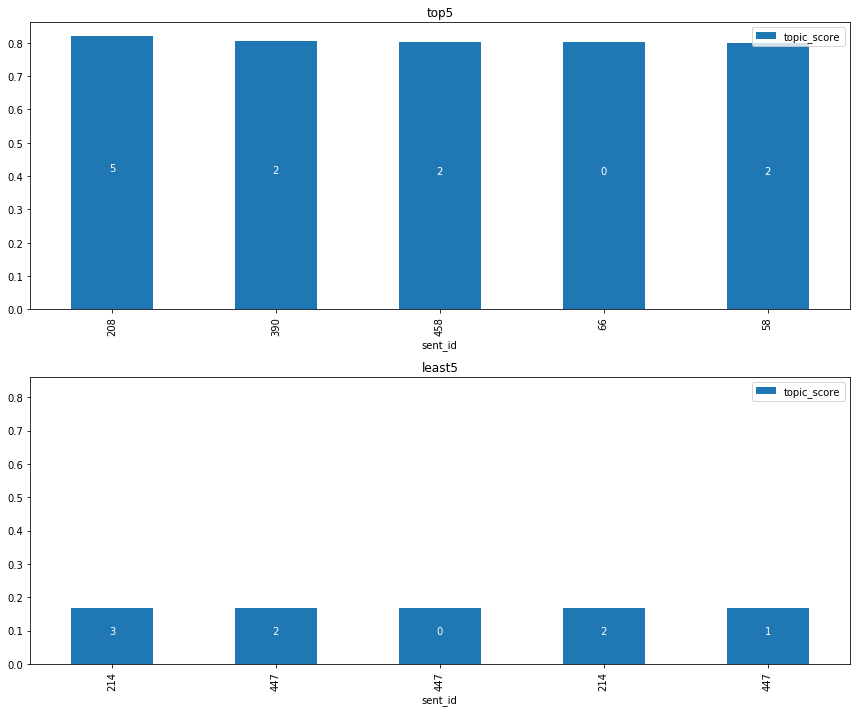

In [9]:

show_top_k_topics(df_m_dom_topics)


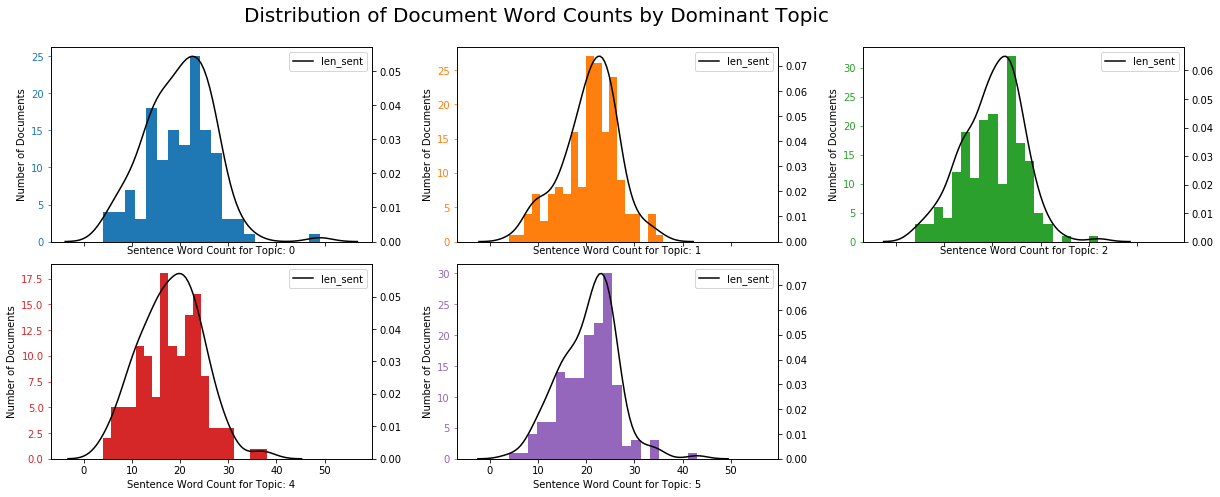

In [10]:

show_topic_distributions(df_m_dom_topics, col_sent_len="len_sent")

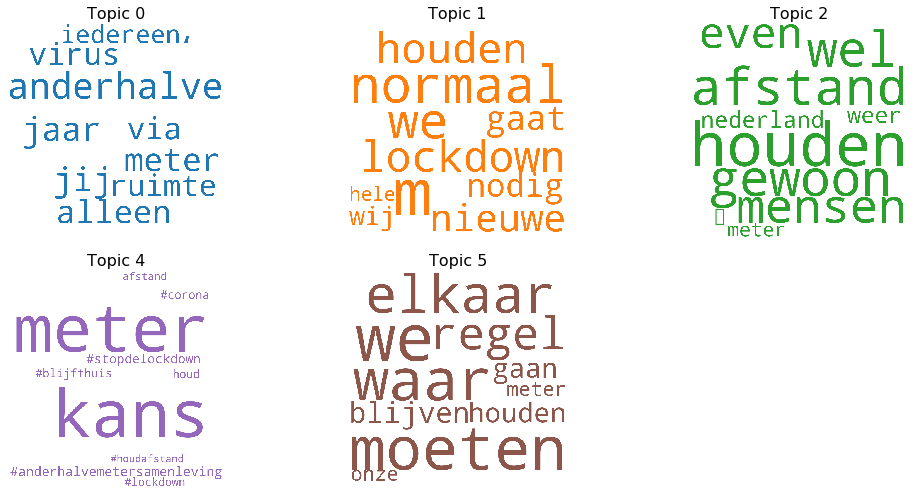

In [11]:

topics = df_topics.groupby(col_topic_id).apply(
    lambda df: df.set_index(col_word).to_dict("dict")[col_topic_score]).to_dict()
show_topic_wordclouds(df_m_dom_topics, topics)


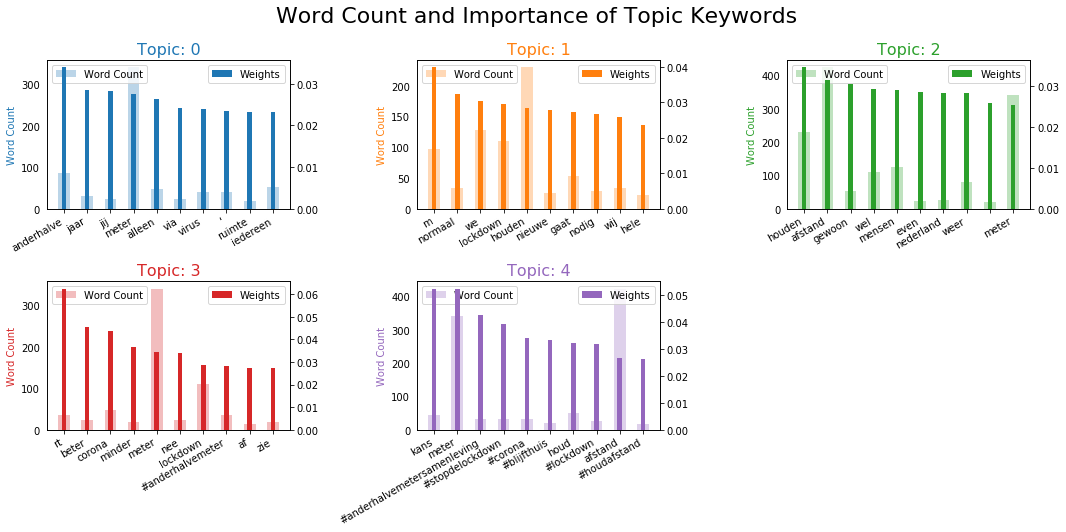

In [12]:

show_wordcounts_and_topics(topics, df_corpus["word"].values)


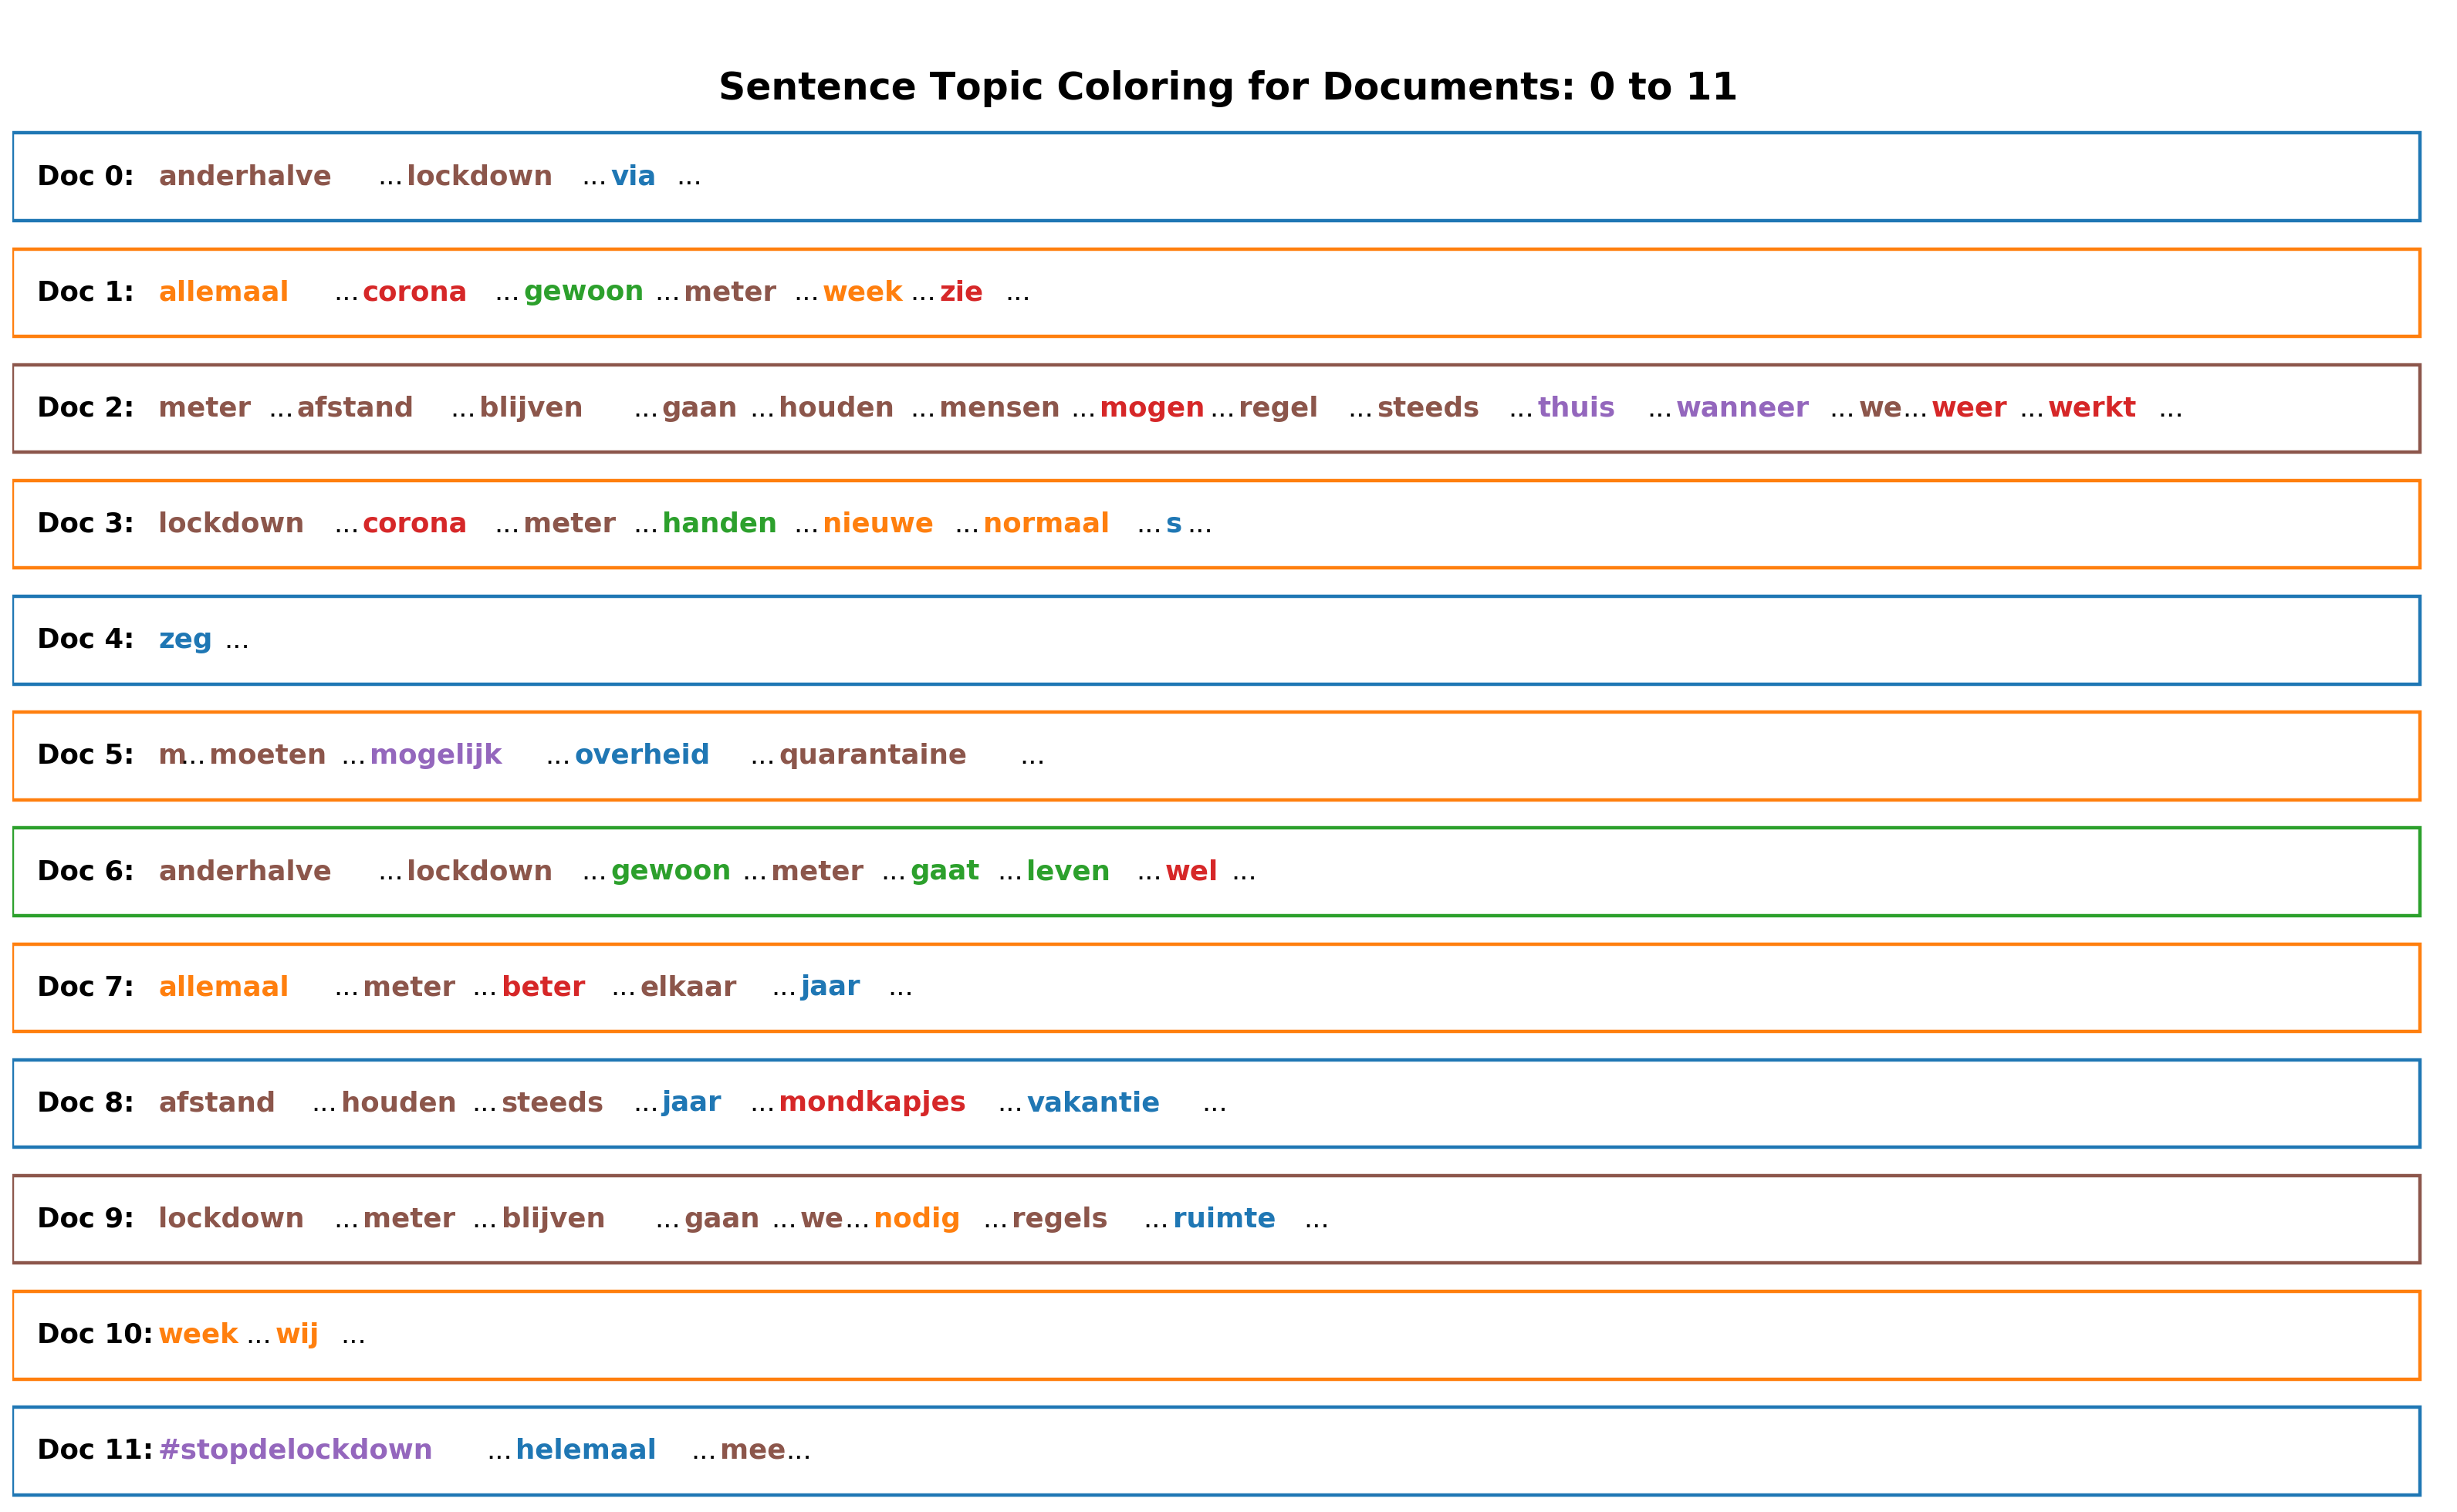

In [13]:
# # Sentence Coloring of N Sentences

tmp_cols = [col_word, col_topic_id]
indices = df_word_results.groupby(tmp_cols)[col_topic_score].transform(max) == df_word_results[col_topic_score]
word_topics_strongest = df_word_results[indices].set_index("sent_id")[tmp_cols].groupby(col_sent_id)[tmp_cols].apply(
    lambda df: df.set_index(col_word).to_dict("dict")[col_topic_id]).to_dict()
sent_topics_strongest = df_m_dom_topics[col_topic_id].to_dict()
show_sentences(sent_topics_strongest, word_topics_strongest)


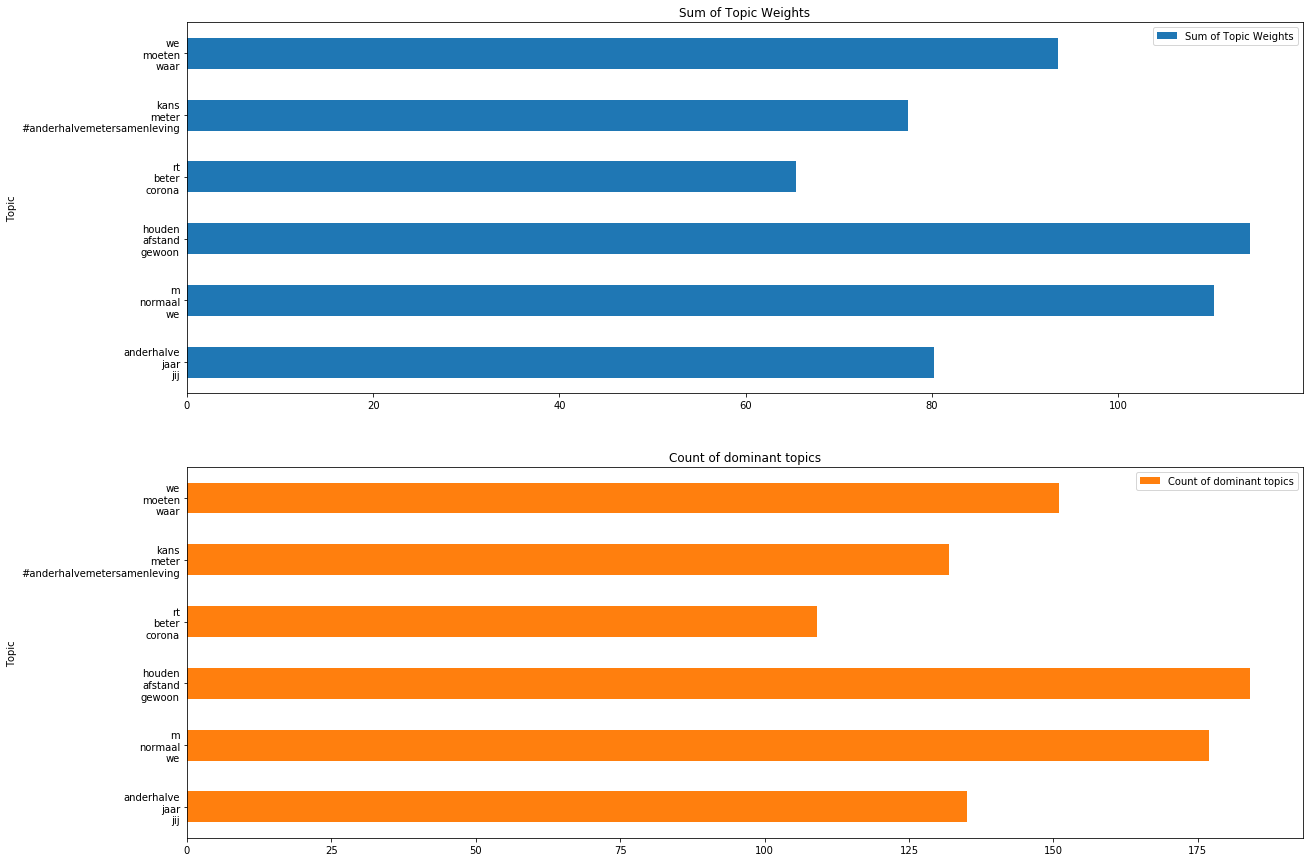

In [14]:

show_topic_weights_and_counts(df_m_dom_topics)